# MTH 575 Report 3

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math as mt
import warnings
warnings.filterwarnings("ignore")

In [2]:
def plot_evol(U,T,X,title):
    fig = plt.figure(figsize=[10,3])
    axs = fig.subplots(nrows=1, ncols=4)
    times = np.linspace(0,len(T)-1,4, dtype=np.uint16)
    idx = [0,1,2,3]
    for i in range(len(times)):
        ax = axs[idx[i]]
        ax.plot(X,U[times[i]])
        ax.set_title(f"t={round(T[times[i]])}s")
        ax.set_ylim(np.min(U[0])-1,np.max(U[0])+1)
        ax.set_xlim(-20,20)
        ax.grid()
    fig.suptitle(title)
    plt.show()
    plt.close('all')

## Advection and Burger's equations with delta function initial value

Here, I check the behavior of delta function (limiting) initial value on the finite difference methods used till now.

In [200]:
def flux(u):
    return 0.1*np.power(u,2)/2
flux = np.vectorize(flux)

def flux_d1(u):
    return 0.1*u
flux_d1 = np.vectorize(flux_d1)

In [205]:
# UP-DOWN-WIND SCHEME
def up_down_wind(U,T,X,del_t,del_x):
    N_X = len(X)
    sig = del_t/del_x
    for n in range(len(T)-1):
        f = flux(U[n])
        f1 = flux_d1(U[n])  
        for j in range(N_X):
            U[n+1,(j)%N_X] = U[n,(j)%N_X] - sig*(f1[j]+abs(f1[j]))*(f[j] - f[(j-1)%N_X])/2 \
            - sig*(f1[j]-abs(f1[j]))*(f[(j+1)%N_X] - f[j])/2
    return U

#LAX FRIEDRICH'S SCHEME
def lax_fried(U,T,X,del_t,del_x):
    sig = del_x/del_t
    for n in range(len(T)-1):
        for j in range(0,len(X)):
            #using periodic boundary conditions
            jp1 = (j+1)%len(X) 
            jm1 = (j-1)%len(X)
            up1 = U[n][jp1]
            um1 = U[n][jm1]

            U[n+1][j] = (up1+um1)/2 - (flux(up1)-flux(um1))/(2*sig)
    return U

#LAX WENDROFF'S SCHEME
def lax_wend(U,T,X,del_t,del_x):
    sig = del_x/del_t
    for n in range(len(T)-1):
        for j in range(0,len(X)):
            jp1 = (j+1)%len(X)
            jm1 = (j-1)%len(X)
            u = U[n][j]
            up1 = U[n][jp1]
            um1 = U[n][jm1]
            uph = (up1+u)/2 - (flux(up1)-flux(u))/(2*sig)
            umh = (u+um1)/2 - (flux(u)-flux(um1))/(2*sig)

            U[n+1][j] = u - (flux(uph)-flux(umh))/sig
    return U

In [204]:
# SETTING UP GRID
del_t = 0.01
del_x = 0.1
x_i, x_f = -20, 20
t_i, t_f = 0, 4
eps = 1e-6

T = np.arange(t_i, t_f+eps, del_t)
X = np.arange(x_i, x_f+eps, del_x)
U = np.zeros(shape=(len(T), len(X)))

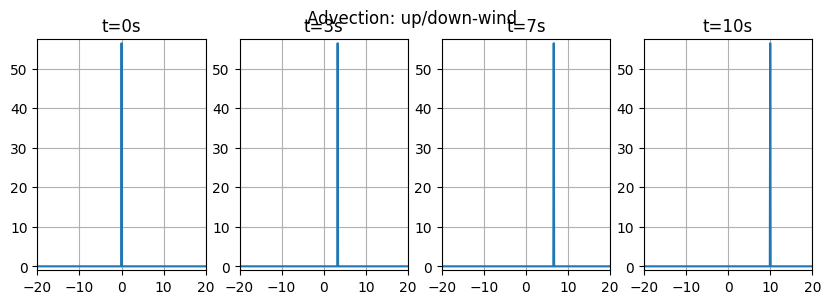

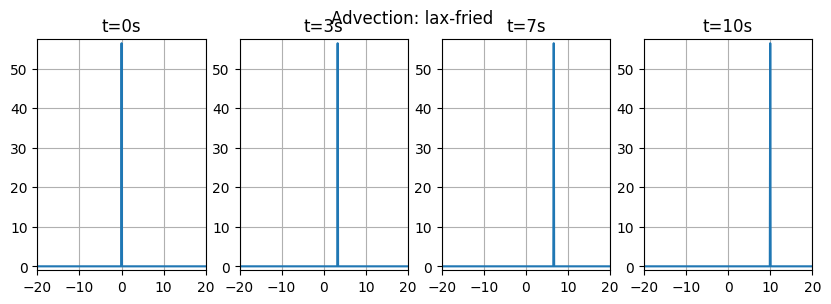

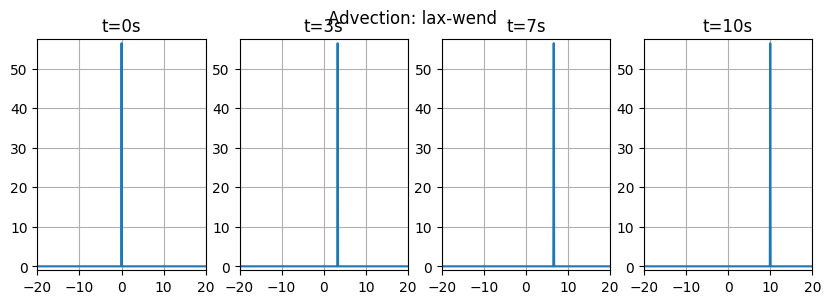

In [174]:
# GAUSSIAN DELTA FUNCTION PULSE
a = 1e-4
U[0] = 1/mt.sqrt(a*mt.pi)*np.exp(-X**2/a)

U = up_down_wind(U=U,T=T,X=X,del_t=del_t,del_x=del_x)
plot_evol(U=U,T=T,X=X,title="Advection: up/down-wind")

U = lax_fried(U=U,T=T,X=X,del_t=del_t,del_x=del_x)
plot_evol(U=U,T=T,X=X,title="Advection: lax-fried")

U = lax_wend(U=U,T=T,X=X,del_t=del_t,del_x=del_x)
plot_evol(U=U,T=T,X=X,title="Advection: lax-wend")

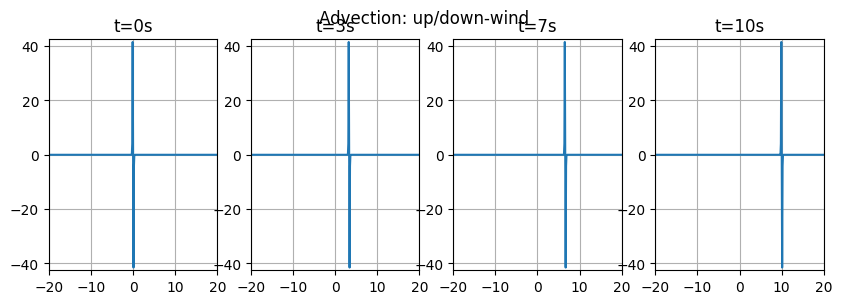

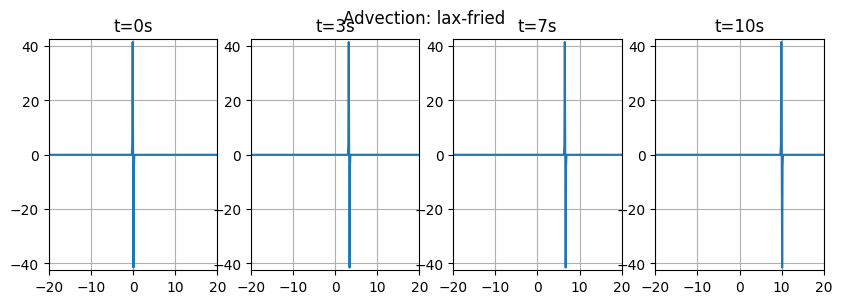

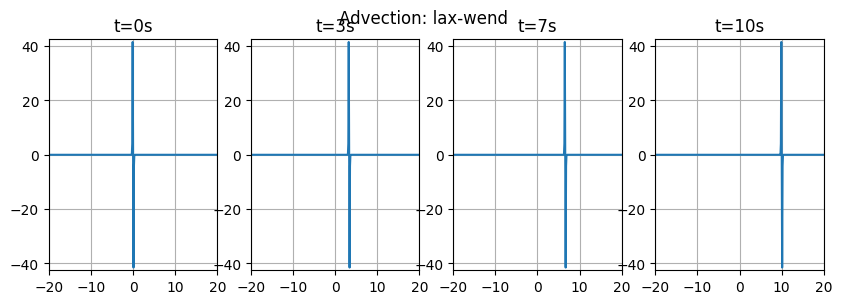

In [178]:
# GAUSSIAN DELTA FUNCTION DERIVATIVE PULSE
a = 1e-2
U[0] = -2*X*1/mt.sqrt(a**3*mt.pi)*np.exp(-X**2/a)

U = up_down_wind(U=U,T=T,X=X,del_t=del_t,del_x=del_x)
plot_evol(U=U,T=T,X=X,title="Advection: up/down-wind")

U = lax_fried(U=U,T=T,X=X,del_t=del_t,del_x=del_x)
plot_evol(U=U,T=T,X=X,title="Advection: lax-fried")

U = lax_wend(U=U,T=T,X=X,del_t=del_t,del_x=del_x)
plot_evol(U=U,T=T,X=X,title="Advection: lax-wend")

**Observations:** All three schemes appear to give stable and correct evolution results for both $\delta(x)$ and $\delta'(x)$ for the advection equation.

Now onto Burger's equation.

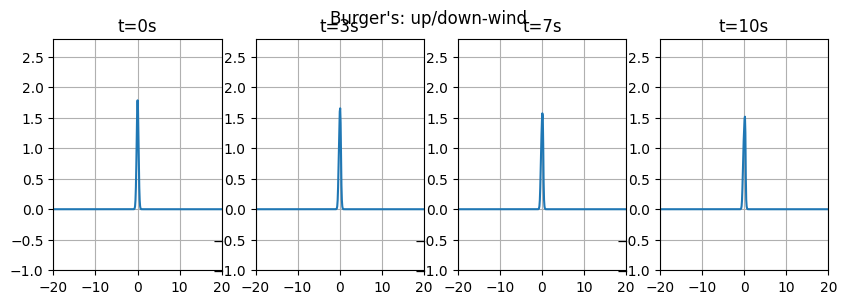

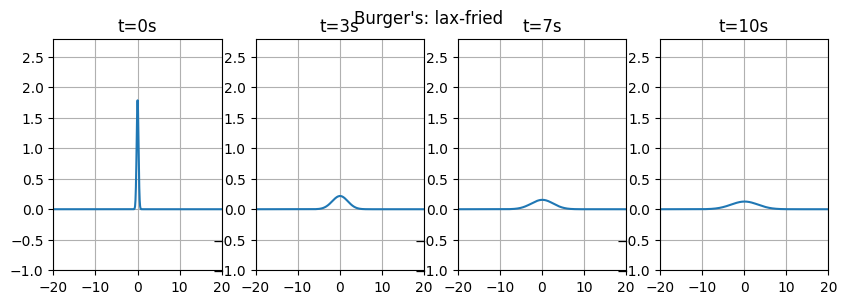

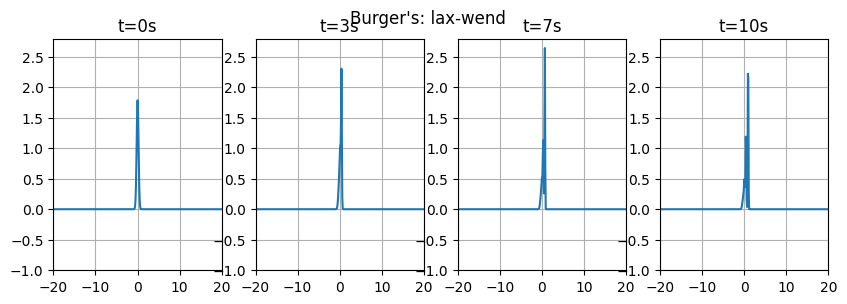

In [206]:
# GAUSSIAN DELTA FUNCTION PULSE
a = 1e-1
U[0] = 1/mt.sqrt(a*mt.pi)*np.exp(-X**2/a)

U = up_down_wind(U=U,T=T,X=X,del_t=del_t,del_x=del_x)
plot_evol(U=U,T=T,X=X,title="Burger's: up/down-wind")

U = lax_fried(U=U,T=T,X=X,del_t=del_t,del_x=del_x)
plot_evol(U=U,T=T,X=X,title="Burger's: lax-fried")

U = lax_wend(U=U,T=T,X=X,del_t=del_t,del_x=del_x)
plot_evol(U=U,T=T,X=X,title="Burger's: lax-wend")

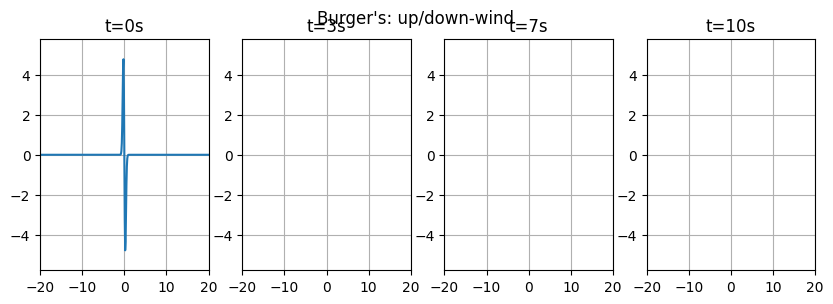

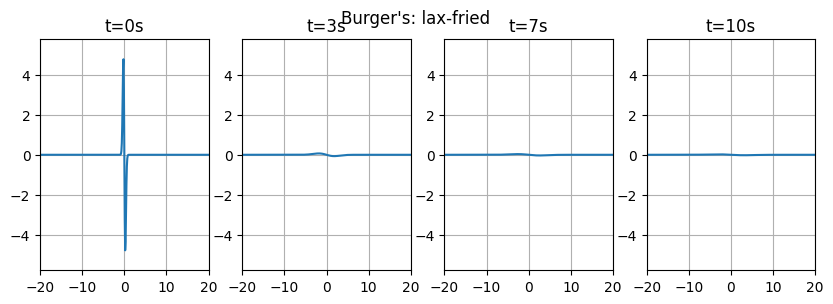

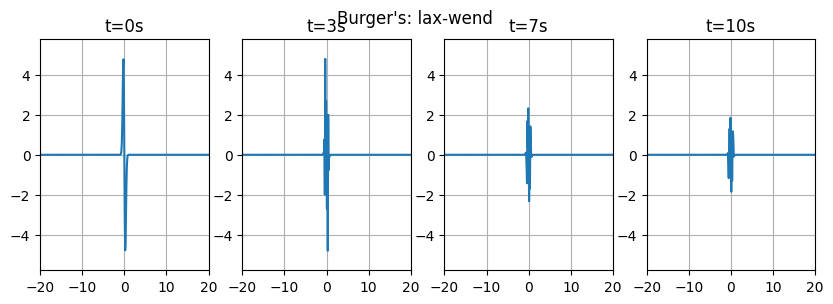

In [207]:
# GAUSSIAN DELTA FUNCTION DERIVATIVE PULSE
a = 5e-1
U[0] = -2*X/mt.sqrt(a**3*mt.pi)*np.exp(-X**2/a)

U = up_down_wind(U=U,T=T,X=X,del_t=del_t,del_x=del_x)
plot_evol(U=U,T=T,X=X,title="Burger's: up/down-wind")

U = lax_fried(U=U,T=T,X=X,del_t=del_t,del_x=del_x)
plot_evol(U=U,T=T,X=X,title="Burger's: lax-fried")

U = lax_wend(U=U,T=T,X=X,del_t=del_t,del_x=del_x)
plot_evol(U=U,T=T,X=X,title="Burger's: lax-wend")

**Obervations:**
For both $\delta(x)$ and $\delta'(x)$; only the Lax-Wendroff method appears to show the correct shock formation. Lax-Friedrich's method diffuses quickly and no shock is observed. No shock is oberved in the up-down-wind scheme, and the numerical solution for $\delta'(x)$ breaks down after the initial few steps.


## Weighted Essentially Non-Oscialltory (WENO) Scheme

The aim is to numerically solve the following conservation law:

$$ \partial_t (u_j) = -\frac{1}{\Delta x} (\hat{f}_{j+1/2} - \hat{f}_{j-1/2})$$

$\hat{f}_{j+1/2}$ is the numerical flux, which is approximated by neighbouring points using a particula stencil.

The finite difference methods studied till only give linear convergence near discontinuities, which is not ideal. The ENO/WENO methods gives better convergence near these points by using a different stencil for computing the fluxes.

In the ENO scheme, one uses only the best stencil, where best is defined as the one having the best least parameter, which is defined appropriately. The weighted ENO is a slight modification on this, which involves taking a weighted (according the the smoothness parameter again) sum of the results of all stencils used.

In using these stencils ENO, near a discontinuity, choses a stencil which leaves the point of disconinuity, thereby increasing convergence. WENO still includes that stencil, albeit with a correspondingly small weight.

### Flux Splitting
To chose the correct stencil for the right and left moving solutions.
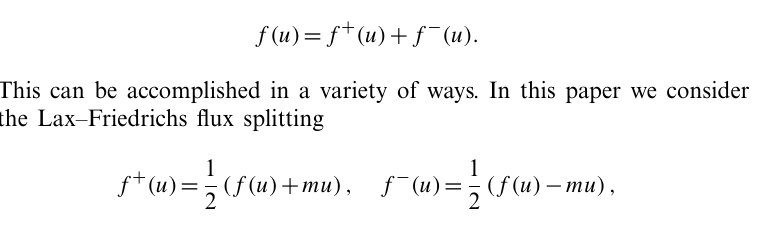

### Smoothness Parameters
If a discontinuity is inside a stencil, the smoothness measurement "IS" becomes large, and vice versa.

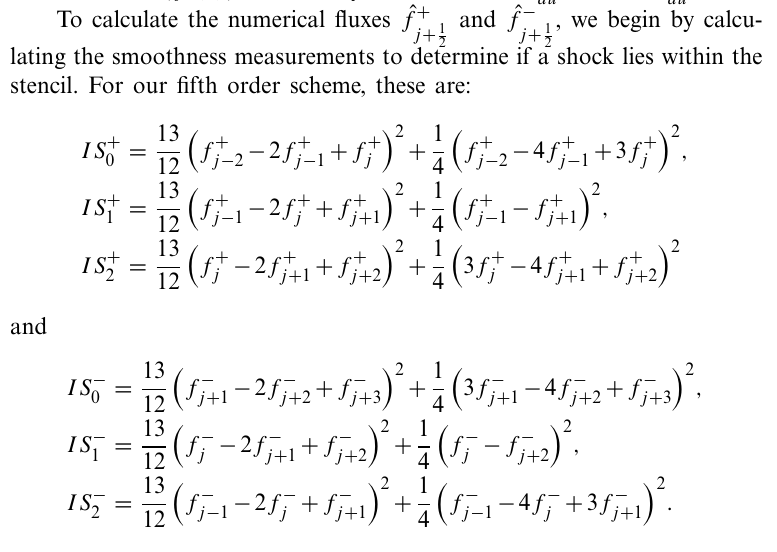

These then give us the smoothness parameters, which can be normalized as shown.

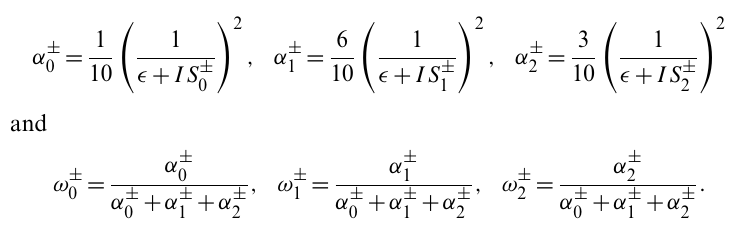

### Numerical Fluxes

One can hence compute the numerical fluxes as,

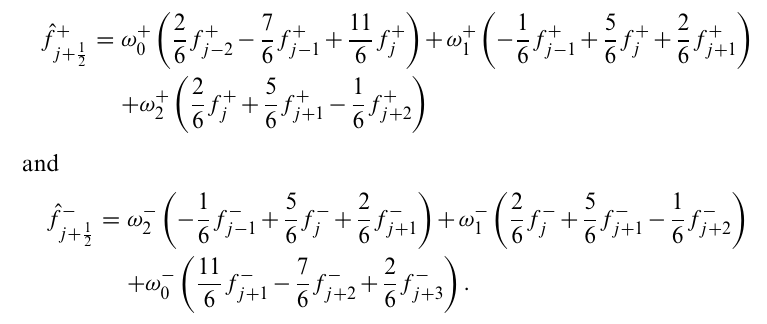

In [3]:
def flux(u):
    return u#np.power(u,2)/2.0
flux = np.vectorize(flux)

def flux_d1(u):
    return 1
flux_d1 = np.vectorize(flux_d1)

def flux_split(f, f1, u):
    # The right moving and left moving flux are separated, since they require
    # different spacial dicretizations. This is implemented via the
    # Lax-Friedrich's scheme of flux-splitting. 
    m = np.max(abs(f1))
    fs = {}
    fs["+"] = (f+m*u)/2.0
    fs["-"] = (f-m*u)/2.0
    return fs

In [4]:
def smooth_par(fs, eps=1e-6):
    # fp: current state of flux+
    # fm: current state of flux-
    # eps: numerical stability parameter

    # Here, the smoothness measurements (IS) are computed for stencils   
    # cumulatively using the 5 neighoburing points j-2 -> j+2. These are done 
    # separately for f+ and f- 

    N = fs["+"].shape[0]
    fp = fs["+"]
    fm = fs["-"]
    omega = {"+":np.zeros(shape=(N,3), dtype=np.float64), "-":np.zeros(shape=(N,3), dtype=np.float64)}

    for j in range(N):
        IS = {"+":{}, "-":{}}

        IS["+"][0] = 13/12*(fp[(j-2)%N]-2*fp[(j-1)%N]+fp[(j)%N])**2 + 1/4*(fp[(j-2)%N]-4*fp[(j-1)%N]+3*fp[(j)%N])**2
        IS["+"][1] = 13/12*(fp[(j-1)%N]-2*fp[(j)%N]+fp[(j+1)%N])**2 + 1/4*(fp[(j-1)%N]-fp[(j+1)%N])**2
        IS["+"][2] = 13/12*(fp[(j)%N]-2*fp[(j+1)%N]+fp[(j+2)%N])**2 + 1/4*(fp[(j)%N]-4*fp[(j+1)%N]+3*fp[(j+2)%N])**2

        IS["-"][0] = 13/12*(fm[(j+1)%N]-2*fm[(j+2)%N]+fm[(j+3)%N])**2 + 1/4*(fm[(j+1)%N]-4*fm[(j+2)%N]+3*fm[(j+3)%N])**2
        IS["-"][1] = 13/12*(fm[(j)%N]-2*fm[(j+1)%N]+fm[(j+2)%N])**2 + 1/4*(fm[(j)%N]-fm[(j+2)%N])**2
        IS["-"][2] = 13/12*(fm[(j-1)%N]-2*fm[(j)%N]+fm[(j+1)%N])**2 + 1/4*(fm[(j-1)%N]-4*fm[(j)%N]+3*fm[(j+1)%N])**2

        # The IS are then used to compute the un-normalized stencil weights.

        alpha = {"+":{}, "-":{}}
        for key in alpha.keys():
            alpha[key][0] = 1/10 * (1/(eps+IS[key][0]))**2
            alpha[key][1] = 6/10 * (1/(eps+IS[key][1]))**2
            alpha[key][2] = 3/10 * (1/(eps+IS[key][2]))**2

        del(IS)

        # These weights can now be normalized.
        omg = {"+":np.zeros(shape=3, dtype=np.float64), "-":np.zeros(shape=3, dtype=np.float64)}
        for key in omg.keys():
            sum = alpha[key][0]+alpha[key][1]+alpha[key][2]
            omg[key][0] = alpha[key][0]/sum
            omg[key][1] = alpha[key][1]/sum
            omg[key][2] = alpha[key][2]/sum
            del(sum)
        del(alpha)

        omega["+"][j] = omg["+"]
        omega["-"][j] = omg["-"]

    return omega

In [5]:
def num_flux(fs, omega):
    # Once one has the weights for each stencil, one computes the weighted sum
    # of the numerical flux approximations for different stencils.
    N = fs["+"].shape[0]
    f_num = {"+":np.zeros(shape=N, dtype=np.float64), "-":np.zeros(shape=N, dtype=np.float64)}
    for j in range(N):
        fnm = {}
        fnm["+"] = omega["+"][j,0]*(2/6*fs["+"][(j-2)%N] - 7/6*fs["+"][(j-1)%N] + 11/6*fs["+"][(j)%N]) +\
                    omega["+"][j,1]*(-1/6*fs["+"][(j-1)%N] + 5/6*fs["+"][(j)%N] + 2/6*fs["+"][(j+1)%N]) +\
                    omega["+"][j,2]*(2/6*fs["+"][(j)%N] - 7/6*fs["+"][(j+1)%N] + 11/6*fs["+"][(j+2)%N])

        fnm["-"] = omega["-"][j,0]*(-1/6*fs["-"][(j-1)%N] + 5/6*fs["-"][(j)%N] + 2/6*fs["-"][(j+1)%N]) +\
                    omega["-"][j,1]*(2/6*fs["-"][(j)%N] + 5/6*fs["-"][(j+1)%N] - 1/6*fs["-"][(j+2)%N]) +\
                    omega["-"][j,2]*(11/6*fs["-"][(j+1)%N] - 7/6*fs["-"][(j+2)%N] + 2/6*fs["-"][(j+3)%N]) 

        f_num["+"][j] = fnm["+"]
        f_num["-"][j] = fnm["-"]
        del(fnm)
    return f_num

In [6]:
def weno(U,T,X,del_t,del_x):
    # U: len(T) x len(X) field
    # T: temporal grid
    # X: spacial grid
    # del_t: temporal spacing
    # del_x: spacial spacing
    
    # With the weighted sum for numerical fluxes, one can implement time-
    # stepping, which for the moment is done via RK4.

    N_T = len(T)
    N_X = len(X)

    for n in range(N_T-1):
        f, f1 = flux(U[n]), flux_d1(U[n])
        fs = flux_split(f,f1,U[n])
        omega = smooth_par(fs=fs, eps=1e-6)
        f_num = num_flux(fs=fs, omega=omega)
        fs_d1 = np.zeros(shape=N_X, dtype=np.float64)

        for j in range(N_X):
            for key in f_num.keys():
                fs_d1[(j)%N_X] += (f_num[key][(j)%N_X] - f_num[key][(j-1)%N_X])
            fs_d1[(j)%N_X] *= 1/del_x
        
        U[n+1] = rk4_time_step(u=U[n], fs_d1=fs_d1, del_t=del_t, del_x=del_x)

    return U

In [7]:
def rk4_time_step(u, fs_d1, del_t, del_x):
    # u: current field state
    # fs_d1: numerical flux derivative
    # del_t: tmeporal spacing.
    # del_x: spacial spacing
    
    N_X = len(u)
    k = np.zeros(shape=(N_X,4), dtype=np.float64)
    
    for j in range(N_X):
        k[j,0] = -del_t * fs_d1[j]
        k[j,1] = -del_t * (flux(u[j] + 0.5*k[j,0])-flux(u[(j-1)%N_X] + 0.5*k[j,0]))/del_x
        k[j,2] = -del_t * (flux(u[j] + 0.5*k[j,1])-flux(u[(j-1)%N_X] + 0.5*k[j,1]))/del_x
        k[j,3] = -del_t * (flux(u[j] + k[j,2])-flux(u[(j-1)%N_X] + k[j,2]))/del_x

    u_next = u + (1/6)*(k[:,0] + 2*k[:,1] + 2*k[:,2] + k[:,3])

    return u_next

In [8]:
def rk4_time_step_discrete(u, fs_d1, del_t):
    # u: current field state
    # fs_d1: numerical flux derivative
    # del_t: tmeporal spacing.
    
    N_X = len(u)
    k = np.zeros(shape=(N_X,4), dtype=np.float64)

    k[:,0] = -del_t * fs_d1[:]
    k[:,1] = -del_t * (fs_d1[:] + 0.5*k[:,0])
    k[:,2] = -del_t * (fs_d1[:] + 0.5*k[:,1])
    k[:,3] = -del_t * (fs_d1[:] + k[:,2])

    u_next = u + (1/6)*(k[:,0] + 2*k[:,1] + 2*k[:,2] + k[:,3])

    return u_next

In [9]:
del_t = 0.05
del_x = 0.1
sig = (del_x/del_t)
x_i, x_f = -20, 20
t_i, t_f = 0, 10
eps = 1e-6

T = np.arange(t_i, t_f+eps, del_t)
X = np.arange(x_i, x_f+eps, del_x)
U = np.zeros(shape=(len(T), len(X)))

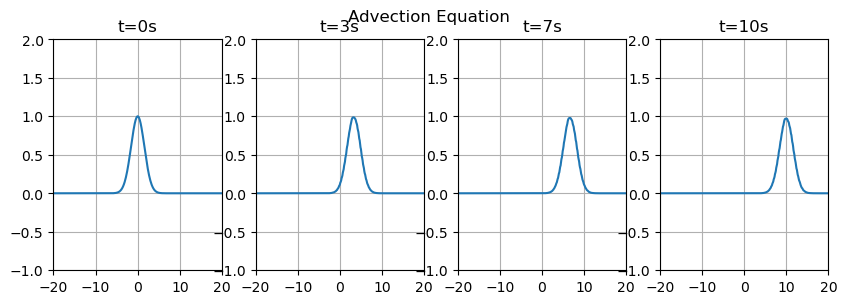

In [10]:
# GAUSSIAN PULSE
U[0] = np.exp(-X**2/5)
U = weno(U=U, T=T, X=X, del_t=del_t, del_x=del_x)
plot_evol(U=U, T=T, X=X, title="Advection Equation")

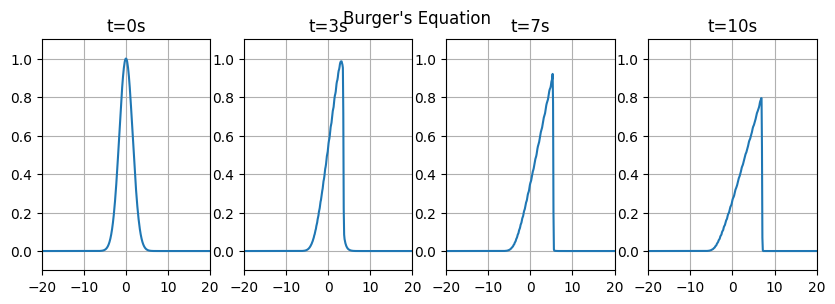

In [141]:
U = weno(U=U, T=T, X=X, del_t=del_t, del_x=del_x)
plot_evol(U=U, T=T, X=X,title="Burger's Equation")

**Observations:** The WENO scheme appears to give the correct evolution for both equations. However, some numerical diffusion is observed.